#Assignment sucessfully and completely Done Induvidually
#Vansh Kapoor 200100164

In [2]:
import cv2
from google.colab import drive
from google.colab.patches import cv2_imshow
import numpy as np
from numpy import fft
from numpy.fft import fft2,fftshift,ifft2,ifftshift
import matplotlib.pyplot as plt
from scipy.signal import fftconvolve,gaussian

# Measuring PSNR, SSIR and performing isotropic Gaussian Blurring after Additive white Gaussian noise (AWGN) 

##Adding white gaussian noise

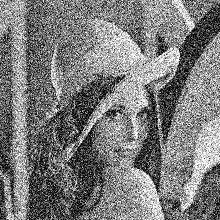

[[49 60 69 ... 51 44 36]
 [59 72 84 ... 59 51 42]
 [67 83 96 ... 65 56 45]
 ...
 [25 34 44 ... 41 36 30]
 [22 29 38 ... 36 32 27]
 [18 24 31 ... 30 27 23]]


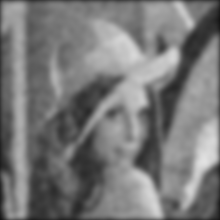

In [89]:
i=cv2.imread('/content/drive/MyDrive/lena.jpg',0).astype('float64')
i_noisy=i.copy()
i_noisy+=np.random.normal(0,7**2,i.shape) #adding white gaussian noise
i=np.clip(i_noisy,0,255) #Clippping it from 0-255
cv2_imshow(i_noisy)

gaussian_filter=np.outer(gaussian(15,3),gaussian(15,3)) #Creating a 2-D Gaussian filter
gaussian_filter/=np.sum(gaussian_filter) #averaging it out

i_1=fftconvolve(i_noisy,gaussian_filter,'same')
i_1=np.clip(i_1,0,255).astype('uint8')
print(i_1)

cv2_imshow(i_1)

##Measuring PSNR

In [90]:
def PSNR(i_original,i_restored):
    mse=0
    i_original=i_original.astype('float')
    i_restored=i_restored.astype('float')
    mse=np.mean((i_original-i_restored)**2) # using defination ofmean squared error
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
        return 100
    x=10*(np.log10(255**2)-np.log10(mse)) #Giving output in db
    return x

print(PSNR(i,i_1))


14.150294072137687


##Measuring SSIM

In [91]:
def SSIM(i1,i2,alpha=1,beta=1,gamma=1):
    i1=i1.astype('float64')
    i1=i1.astype('float64')

    mean1=np.mean(i1)
    mean2=np.mean(i2)
    lum= 2*mean1*mean2/(mean1**2 +mean2**2) #finding Luminance comparison function

    sigma1=np.sqrt(np.mean((i1-mean1)**2))
    sigma2=np.sqrt(np.mean((i2-mean2)**2))
    contrast= 2*sigma1*sigma2/(sigma1**2 + sigma2**2) #Calculating Contrast comparison function

    sigma12=np.mean((i1-mean1)*(i2-mean2))
    struct=sigma12/(sigma1*sigma2) #Calculating Structure comparison function

    ssim=(lum**alpha)*(contrast**beta)*(struct**gamma)
    return ssim
print(SSIM(i_1,i))


0.577311947579189


##Performing Isotropic Gaussian blurring 

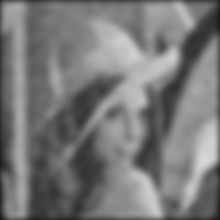

In [92]:
Gaussian_kernel=np.outer(gaussian(15,4),gaussian(15,4))#Creating a 2-D Gaussian filter
Gaussian_kernel/=np.sum(Gaussian_kernel)
i_blurred=fftconvolve(i,Gaussian_kernel,'same')
cv2_imshow(i_blurred)

#Denoising functions for wavelet transforms

##Adding White Gaussian Noise of standard deviation 35

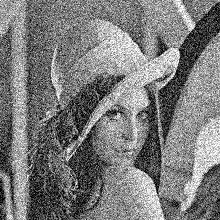

In [69]:
import pywt

i=cv2.imread('/content/drive/MyDrive/lena.jpg',0).astype('float64')
i_noisy=i.copy()
i_noisy=i_noisy+np.random.normal(0,35,i.shape) #adding white gaussian noise
i_noisy=np.clip(i_noisy,0,255).astype('uint8')
cv2_imshow(i_noisy)



##Hard thresholding

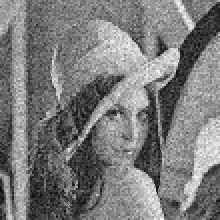

22.06290226959963 17.444980799988592 0.9136408126555713 0.792495624600848


In [70]:
cA, (cH, cV, cD) = pywt.dwt2(i_noisy.astype('float'), 'haar')
# cA => LL coefficient
# cH => LH coefficient
# cV => HL coefficient
# cD => HH coefficient

thr=147 #threshold

cV[np.abs(cV)<thr]=0
cH[np.abs(cH)<thr]=0
cD[np.abs(cD)<thr]=0
#seting to zero any detail (LH, HL, HH) coefficient that is below the threshold

ik=pywt.idwt2((cA,(cH,cV,cD)),'haar')
ik=np.clip(ik,0,255).astype('uint8')
cv2_imshow(ik)
print(PSNR(ik,i),PSNR(i_noisy,i),SSIM(ik,i),SSIM(i_noisy,i))

##Soft Thresholding

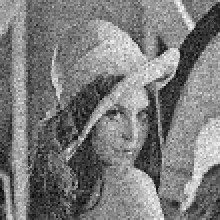

22.164641383504883 17.444980799988592 0.9157389903657813 0.792495624600848


In [71]:
cA, (cH, cV, cD) = pywt.dwt2(i_noisy.astype('float'), 'haar')
# cA => LL coefficient
# cH => LH coefficient
# cV => HL coefficient
# cD => HH coefficient

thr=75 #threshold
cV[np.abs(cV)<thr]=0
cH[np.abs(cH)<thr]=0
cD[np.abs(cD)<thr]=0
#seting to zero any detail (LH, HL, HH) coefficient that is below a threshold

for i1 in range(cV.shape[0]):
    for j in range(cV.shape[1]):
        if(cV[i1,j]!=0):
            if(cV[i1,j]>0):
                cV[i1,j]-=thr #subtracting the threshold from those that are above the threshold
            else:
                cV[i1,j]+=thr

for i1 in range(cH.shape[0]):
    for j in range(cH.shape[1]):
        if(cH[i1,j]!=0):
            if(cH[i1,j]>0):
                cH[i1,j]-=thr #subtracting the threshold from those that are above the threshold
            else:
                cH[i1,j]+=thr

for i1 in range(cD.shape[0]):
    for j in range(cD.shape[1]):
        if(cD[i1,j]!=0):
            if(cD[i1,j]>0):
                cD[i1,j]-=thr #subtracting the threshold from those that are above the threshold
            else:
                cD[i1,j]+=thr

ik=pywt.idwt2((cA,(cH,cV,cD)),'haar')
ik=np.clip(ik,0,255).astype('uint8')
cv2_imshow(ik)
print(PSNR(ik,i),PSNR(i_noisy,i),SSIM(ik,i),SSIM(i_noisy,i))

##Method of Chen et al.

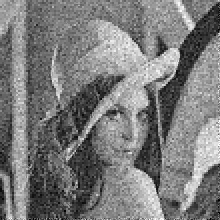

In [73]:
cA, (cH, cV, cD) = pywt.dwt2(i_noisy.astype('float'), 'haar')
cH1=cH.copy()
cV1=cV.copy()
cD1=cD.copy()

# cA => LL coefficient
# cH => LH coefficient
# cV => HL coefficient
# cD => HH coefficient

#function for find some of squares of the elements in a k x k sized window
def f(img,i,j,k):
    s=0
    for l1 in range(-(k//2),(k//2)+1):
        for l2 in range(-(k//2),(k//2)+1):
            if(i+l1>=0 and j+l2>=0):
                s+=img[i+l1,j+l2]**2
    return s

lamda=140

for i1 in range(0,cV.shape[0]-1):
    for j in range(0,cV.shape[1]-1):
        if(f(cV,i1,j,3)<= lamda**2):
            cV1[i1,j]=0
#Comparing S_{i,j}**2 to lamda**2
        else:
            cV1[i1,j]*=1-((lamda**2) /f(cV,i1,j,3))
#Shrinking the Wavelet Coefficients
#Performing similar procedure for other details

for i1 in range(0,cH.shape[0]-1):
    for j in range(0,cH.shape[1]-1):
        if(f(cH,i1,j,3)<= lamda**2):
            cH1[i1,j]=0
        else:
            cH1[i1,j]*=1-((lamda**2) /f(cH,i1,j,3))

for i1 in range(0,cD.shape[0]-1):
    for j in range(0,cD.shape[1]-1):
        if(f(cD,i1,j,3)<= lamda**2):
            cD1[i1,j]=0
        else:
            cD1[i1,j]*=1-((lamda**2) /f(cD,i1,j,3))

ik=pywt.idwt2((cA,(cH1,cV1,cD1)),'haar')
ik=np.clip(ik,0,255).astype('uint8')
cv2_imshow(ik)

# PSNR and SSIM Plots based on varying Noise Variance and other parameters

##Varying Noise Variance

In [74]:
psnr=[]
ssim=[]
var=np.linspace(10,900,891)

for t in var:
    i_noisy=i.copy()
    i_noisy+=np.random.normal(0,np.sqrt(t),i.shape) #varying noise variance
    i_noisy=np.clip(i_noisy,0,255).astype('uint8')

    psnr.append(PSNR(i_noisy,i))
    ssim.append(SSIM(i_noisy,i))

###Plotting SSIM VS Variance OF Noise
**We observe that the plot is approximately linear, that is there is linear decay of SSIM with increase in noise variance**

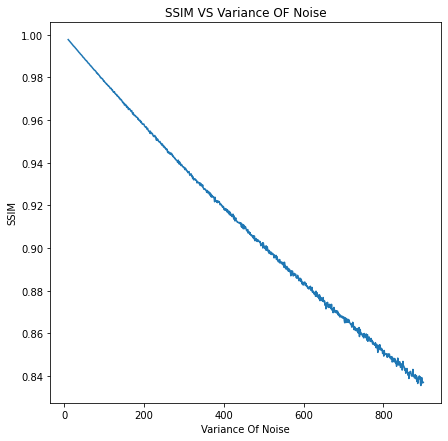

In [75]:
plt.figure(figsize=(7,7))
plt.plot(var,ssim)
plt.xlabel('Variance Of Noise')
plt.ylabel('SSIM')
plt.title('SSIM VS Variance OF Noise')
plt.show()

### Plotting PSNR VS Variance Of Noise
**We observe an Asymptotic decay of PSNR with increase in variance**

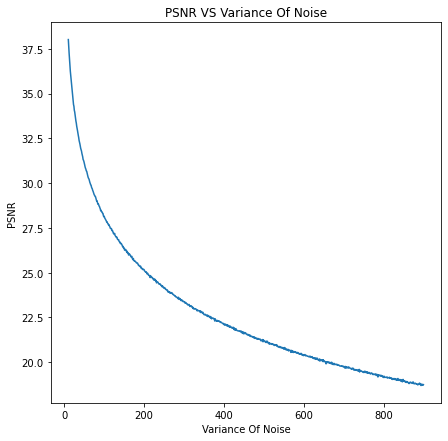

In [76]:
plt.figure(figsize=(7,7))
plt.plot(var,psnr)
plt.xlabel('Variance Of Noise')
plt.ylabel('PSNR')
plt.title('PSNR VS Variance Of Noise')
plt.show()

##Varying Gaussian Kernel Variance and seeing its effect on PSNR and SSIM

In [44]:
psnr=[]
ssim=[]

var=np.linspace(1,800,800)
i_noisy=i.copy()
i_noisy=i_noisy+np.random.normal(0,20,i.shape)
i_noisy=np.clip(i_noisy,0,255).astype('uint8')

for t in var:
    gaussian_filter=np.outer(gaussian(20,np.sqrt(t)),gaussian(20,np.sqrt(t)))
    gaussian_filter/=np.sum(gaussian_filter)
    i_1=fftconvolve(i_noisy,gaussian_filter,'same')
    
    psnr.append(PSNR(i_1,i))
    ssim.append(SSIM(i_1,i))


###Both SSIM and PSNR show a Asymtotic decay with variance of Gaussian kernel

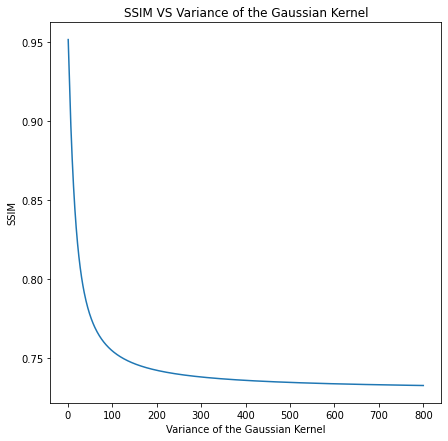

In [47]:
plt.figure(figsize=(7,7))
plt.plot(var,ssim)
plt.xlabel('Variance of the Gaussian Kernel')
plt.ylabel('SSIM')
plt.title('SSIM VS Variance of the Gaussian Kernel')
plt.show()

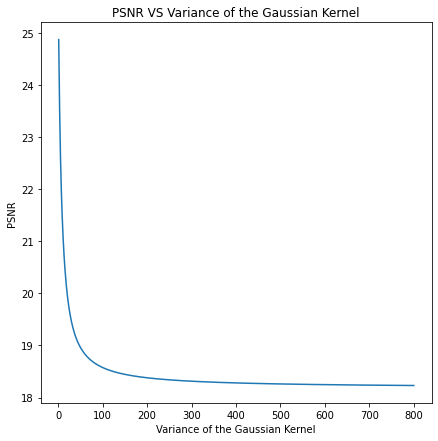

In [48]:
plt.figure(figsize=(7,7))
plt.plot(var,psnr)
plt.xlabel('Variance of the Gaussian Kernel')
plt.ylabel('PSNR')
plt.title('PSNR VS Variance of the Gaussian Kernel')
plt.show()

##Performing Hard Thresholding and plotting PSNR and SSIR wrt Noise Variance

In [59]:
import pywt
psnr=[]
ssim=[]
var=np.linspace(100,800,800)

for t in var:
    i_noisy=i.copy()
    i_noisy=i_noisy+np.random.normal(0,np.sqrt(t),i.shape)
    i_noisy=np.clip(i_noisy,0,255).astype('uint8')
    cA, (cH, cV, cD) = pywt.dwt2(i_noisy.astype('float'), 'haar')
    thr=np.sqrt(t*4*np.log(220))

#Performing Hard thresholding
    cV[np.abs(cV)<thr]=0
    cH[np.abs(cH)<thr]=0
    cD[np.abs(cD)<thr]=0

    ik=pywt.idwt2((cA,(cH,cV,cD)),'haar')
    ik=np.clip(ik,0,255).astype('uint8')

    psnr.append(PSNR(ik,i))
    ssim.append(SSIM(ik,i))

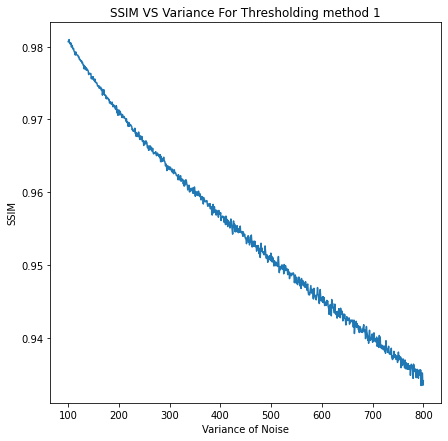

In [60]:
plt.figure(figsize=(7,7))
plt.plot(var,ssim)
plt.xlabel('Variance of Noise')
plt.ylabel('SSIM')
plt.title('SSIM VS Variance For Hard Thresholding method ')
plt.show()

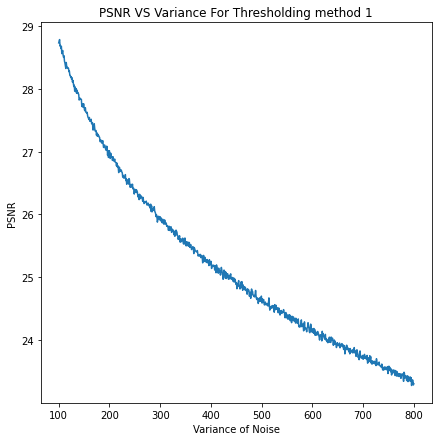

In [61]:
plt.figure(figsize=(7,7))
plt.plot(var,psnr)
plt.xlabel('Variance of Noise')
plt.ylabel('PSNR')
plt.title('PSNR VS Variance For Thresholding method 1')
plt.show()

##Performing Soft Thresholding and plotting PSNR and SSIR wrt Noise Variance

In [52]:
import pywt
psnr=[]
ssim=[]
var=np.linspace(100,800,800)
for t in var:
    i_noisy=i.copy()
    i_noisy=i_noisy+np.random.normal(0,np.sqrt(t),i.shape)
    i_noisy=np.clip(i_noisy,0,255).astype('uint8')
    cA, (cH, cV, cD) = pywt.dwt2(i_noisy.astype('float'), 'haar')
    thr=np.sqrt(t*4*np.log(220))
    cV[np.abs(cV)<thr]=0
    cH[np.abs(cH)<thr]=0
    cD[np.abs(cD)<thr]=0
#Soft Thresholding
    for i1 in range(cV.shape[0]):
        for j in range(cV.shape[1]):
            if(cV[i1,j]!=0):
                if(cV[i1,j]>0):
                    cV[i1,j]-=thr
                else:
                    cV[i1,j]+=thr

    for i1 in range(cH.shape[0]):
        for j in range(cH.shape[1]):
            if(cH[i1,j]!=0):
                if(cH[i1,j]>0):
                    cH[i1,j]-=thr
                else:
                    cH[i1,j]+=thr

    for i1 in range(cD.shape[0]):
        for j in range(cD.shape[1]):
            if(cD[i1,j]!=0):
                if(cD[i1,j]>0):
                    cD[i1,j]-=thr
                else:
                    cD[i1,j]+=thr

    ik=pywt.idwt2((cA,(cH,cV,cD)),'haar')
    ik=np.clip(ik,0,255).astype('uint8')
    psnr.append(PSNR(ik,i))
    ssim.append(SSIM(ik,i))


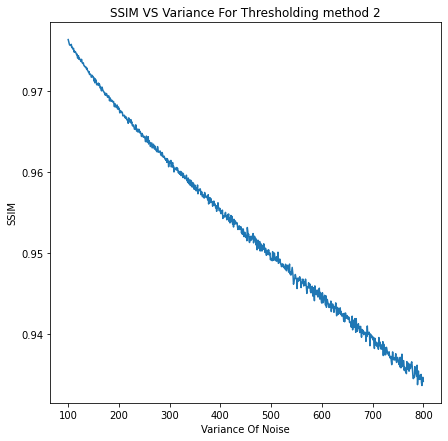

In [56]:
plt.figure(figsize=(7,7))
plt.plot(var,ssim)
plt.xlabel('Variance Of Noise')
plt.ylabel('SSIM')
plt.title('SSIM VS Variance For Thresholding method 2')
plt.show()

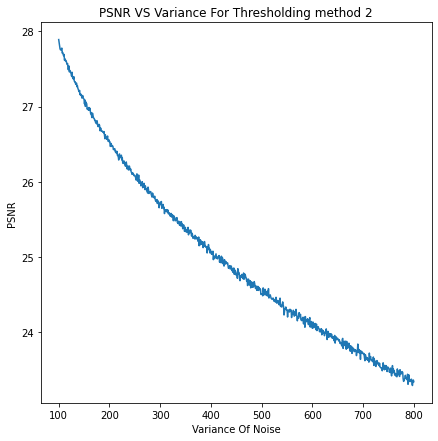

In [55]:
plt.figure(figsize=(7,7))
plt.plot(var,psnr)
plt.xlabel('Variance Of Noise')
plt.ylabel('PSNR')
plt.title('PSNR VS Variance For Thresholding method 2')
plt.show()

### We get quite similar plots using the 2 thresholding Methods

##The method of Chen et al

In [77]:
cA, (cH, cV, cD) = pywt.dwt2(i_noisy.astype('float'), 'haar')
cH1=cH.copy()
cV1=cV.copy()
cD1=cD.copy()

psnr=[]
ssim=[]
var=np.linspace(100,800,800)
for t in var:
    i_noisy=i.copy()
    i_noisy=i_noisy+np.random.normal(0,np.sqrt(t),i.shape)
    i_noisy=np.clip(i_noisy,0,255).astype('uint8')
#method of Chen et al
    lamda=np.sqrt(t*4*np.log(220))
    for i1 in range(0,cV.shape[0]-1):
        for j in range(0,cV.shape[1]-1):
            if(f(cV,i1,j,3)<= lamda**2):
                cV1[i1,j]=0
            else:
                cV1[i1,j]*=1-((lamda**2) /f(cV,i1,j,3))
    for i1 in range(0,cH.shape[0]-1):
        for j in range(0,cH.shape[1]-1):
            if(f(cH,i1,j,3)<= lamda**2):
                cH1[i1,j]=0
            else:
                cH1[i1,j]*=1-((lamda**2) /f(cH,i1,j,3))
    for i1 in range(0,cD.shape[0]-1):
        for j in range(0,cD.shape[1]-1):
            if(f(cD,i1,j,3)<= lamda**2):
                cD1[i1,j]=0
            else:
                cD1[i1,j]*=1-((lamda**2) /f(cD,i1,j,3))
    ik=pywt.idwt2((cA,(cH1,cV1,cD1)),'haar')
    ik=np.clip(ik,0,255).astype('uint8')
    psnr.append(PSNR(ik,i))
    ssim.append(SSIM(ik,i))



###Important Remark: PSNR and SSIR barely Vary with increasing Noise Variance using Method of Chen et al ! 
**This is very useful in Practical Applications**

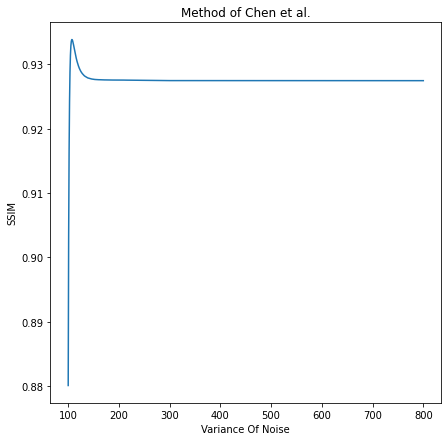

In [78]:
plt.figure(figsize=(7,7))
plt.plot(var,ssim)
plt.xlabel('Variance Of Noise')
plt.ylabel('SSIM')
plt.title('Method of Chen et al.')
plt.show()

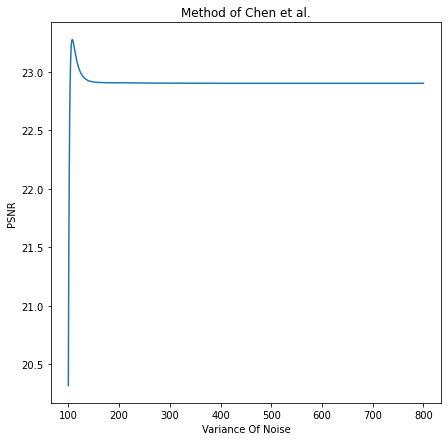

In [79]:
plt.figure(figsize=(7,7))
plt.plot(var,psnr)
plt.xlabel('Variance Of Noise')
plt.ylabel('PSNR')
plt.title('Method of Chen et al.')
plt.show()

##The Method of Chen et al is independently applied to RGB channels

In [101]:
i=cv2.imread('/content/drive/MyDrive/lena.jpg').astype('float')

ssim=[]
psnr=[]
var=np.linspace(100,800,701)
for t in var:
    mse=0
    ss=0
    i_noisy=i.copy()
    i_noisy=i_noisy+np.random.normal(0,np.sqrt(t),i.shape)
    i_noisy=np.clip(i_noisy,0,255).astype('uint8')

    cA, (cH, cV, cD) = pywt.dwt2(i_noisy[:,:,0].astype('float'), 'haar')
    cH0=cH.copy()
    cV0=cV.copy()
    cD0=cD.copy()

    cA_1, (cH_1, cV_1, cD_1) = pywt.dwt2(i_noisy[:,:,1].astype('float'), 'haar')
    cH1=cH_1.copy()
    cV1=cV_1.copy()
    cD1=cD_1.copy()

    cA_2, (cH_2, cV_2, cD_2) = pywt.dwt2(i_noisy[:,:,2].astype('float'), 'haar')
    cH2=cH_2.copy()
    cV2=cV_2.copy()
    cD2=cD_2.copy()

#Making lists which can be used for iterations
    A=[cA,cH,cV,cD,cA_1,cH_1,cV_1,cD_1,cA_2,cH_2,cV_2,cD_2]
    B=[cA,cH0,cV0,cD0,cA_1,cH1,cV1,cD1,cA_2,cH2,cV2,cD2]
    ik=[i[:,:,0].copy(),i[:,:,1].copy(),i[:,:,2].copy()]
#Indenpendently applied to rgb channels

    lamda=np.sqrt(t*4*np.log(220))
    for p in range(3):
        for i1 in range(0,A[4*p+2].shape[0]-1):
            for j in range(0,A[4*p+2].shape[1]-1):
                if(f(A[4*p+2],i1,j,3)<= lamda**2):
                    B[4*p+2][i1,j]=0
                else:
                    B[4*p+2][i1,j]*=1-((lamda**2) /f(A[4*p+2],i1,j,3))

        for j in range(0,A[4*p+1].shape[1]-1):
                if(f(A[4*p+1],i1,j,3)<= lamda**2):
                    B[4*p+1][i1,j]=0
                else:
                    B[4*p+1][i1,j]*=1-((lamda**2) /f(A[4*p+1],i1,j,3))

        for j in range(0,A[4*p+3].shape[1]-1):
                if(f(A[4*p+1],i1,j,3)<= lamda**2):
                    B[4*p+1][i1,j]=0
                else:
                    B[4*p+1][i1,j]*=1-((lamda**2) /f(A[4*p+1],i1,j,3))
        ik[p]=pywt.idwt2((B[4*p],(B[4*p+1],B[4*p+2],B[4*p+3])),'haar')
        ik[p]=np.clip(ik[p],0,255).astype('uint8')

        mse +=np.mean((ik[p]-i[:,:,p])**2)
        ss+=SSIM(ik[p],i[:,:,p])

    psnr.append(10*(np.log10(255**2)-np.log10(mse/3)))
    ssim.append(ss/3)



##We observe an asymptotic decrease in PSNR but an almost linear decrese in SSIM

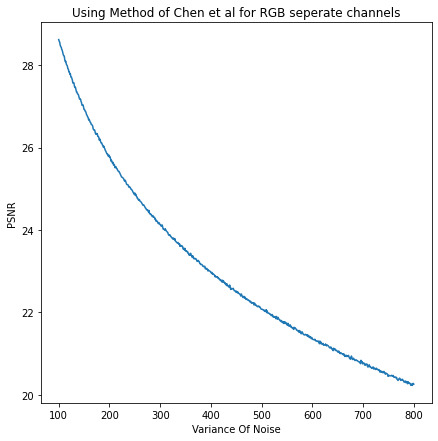

In [105]:
plt.figure(figsize=(7,7))
plt.plot(var,psnr)
plt.xlabel('Variance Of Noise')
plt.ylabel('PSNR')
plt.title('Using Method of Chen et al for RGB seperate channels')
plt.show()

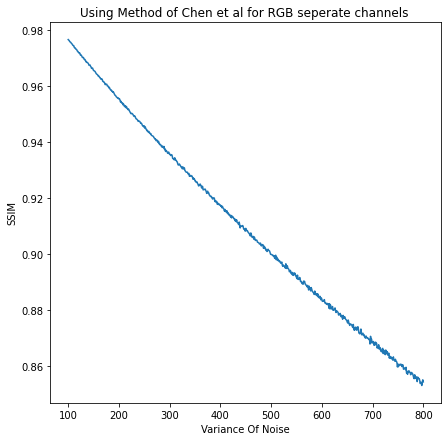

In [106]:
plt.figure(figsize=(7,7))
plt.plot(var,ssim)
plt.xlabel('Variance Of Noise')
plt.ylabel('SSIM')
plt.title('Using Method of Chen et al for RGB seperate channels ')
plt.show()

##Using Method of Chen et al only on I channel

In [189]:
from skimage import color
i=cv2.imread('/content/drive/MyDrive/lena.jpg')
psnr=[]
ssim=[]
var=np.linspace(100,800,800)
for t in var:
    mse=0
    ss=0

    i_noisy=i.copy()
    i_noisy=i_noisy+np.random.normal(0,np.sqrt(t),i.shape)
    i_noisy=np.clip(i_noisy,0,255).astype('uint8')
    i_hsv= color.rgb2hsv(i_noisy)
    Intensity=(i_noisy[:,:,0]+i_noisy[:,:,1]+i_noisy[:,:,2])/3.0
    cA, (cH, cV, cD) = pywt.dwt2(Intensity.astype('float'), 'haar')
    cH1=cH.copy()
    cV1=cV.copy()
    cD1=cD.copy()

    lamda=np.sqrt(t*4*np.log(220))
    for i1 in range(0,cV.shape[0]-1):
        for j in range(0,cV.shape[1]-1):
            if(f(cV,i1,j,3)<= lamda**2):
                cV1[i1,j]=0
            else:
                cV1[i1,j]*=1-((lamda**2) /f(cV,i1,j,3))
    for i1 in range(0,cH.shape[0]-1):
        for j in range(0,cH.shape[1]-1):
            if(f(cH,i1,j,3)<= lamda**2):
                cH1[i1,j]=0
            else:
                cH1[i1,j]*=1-((lamda**2) /f(cH,i1,j,3))
    for i1 in range(0,cD.shape[0]-1):
        for j in range(0,cD.shape[1]-1):
            if(f(cD,i1,j,3)<= lamda**2):
                cD1[i1,j]=0
            else:
                cD1[i1,j]*=1-((lamda**2) /f(cD,i1,j,3))
    ik=pywt.idwt2((cA,(cH1,cV1,cD1)),'haar')
    i_hsv[:,:,2]=np.clip(((i_hsv[:,:,2]*ik)/(Intensity+0.001)),0,255)
    i_rgb= color.hsv2rgb(i_hsv)
    i_rgb=np.clip(i_rgb,0,255).astype('uint8')
    for p in range(3):
        mse+=np.mean((i_rgb[:,:,p]-i[:,:,p])**2)
        ss+=SSIM(i_rgb[:,:,p],i[:,:,p])

    psnr.append(10*(np.log10(255**2)-np.log10(mse/3)))
    ssim.append(ss/3)


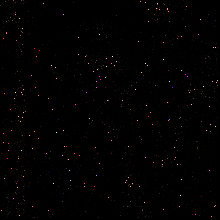

In [190]:
cv2_imshow(i_rgb)

### Horrible SSIM!,but we still recieve pretty decent PSNR
**This implies SSIM is a better way/metric to compare images than PSNR in many cases!**

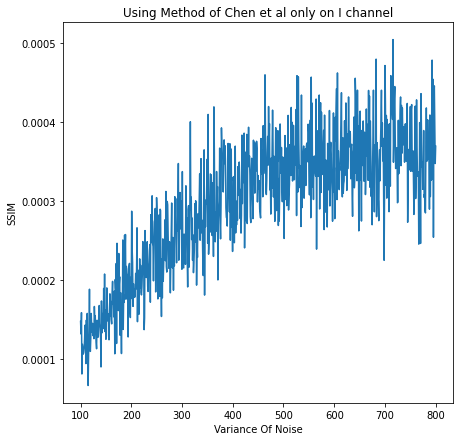

In [191]:
plt.figure(figsize=(7,7))
plt.plot(var,ssim)
plt.xlabel('Variance Of Noise')
plt.ylabel('SSIM')
plt.title('Using Method of Chen et al only on I channel')
plt.show()

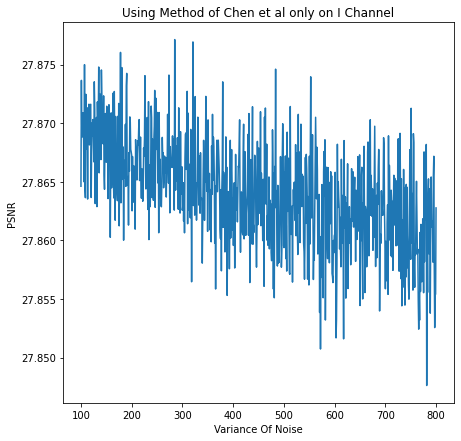

In [192]:
plt.figure(figsize=(7,7))
plt.plot(var,psnr)
plt.xlabel('Variance Of Noise')
plt.ylabel('PSNR')
plt.title('Using Method of Chen et al only on I Channel')
plt.show()

#Using Denoising functions on real life Images

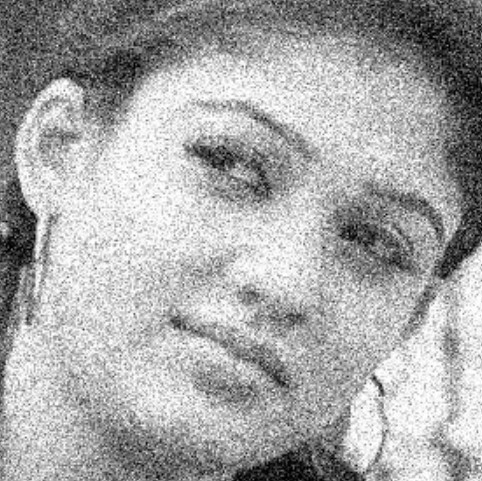

(480, 480)


In [155]:
i=cv2.imread('/content/drive/MyDrive/noi.jpg',0)
cv2_imshow(i)
i=i[0:480,0:480]
print(i.shape)

##Method of Chen et al

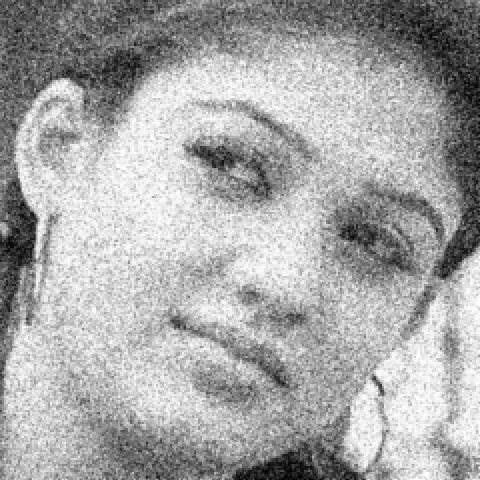

In [178]:
cA, (cH, cV, cD) = pywt.dwt2(i.astype('float'), 'haar')
cH1=cH.copy()
cV1=cV.copy()
cD1=cD.copy()

# cA => LL coefficient
# cH => LH coefficient
# cV => HL coefficient
# cD => HH coefficient

#function for find some of squares of the elements in a k x k sized window
def f(img,i,j,k):
    s=0
    for l1 in range(-(k//2),(k//2)+1):
        for l2 in range(-(k//2),(k//2)+1):
            if(i+l1>=0 and j+l2>=0):
                s+=img[i+l1,j+l2]**2
    return s

lamda=90

for i1 in range(0,cV.shape[0]-1):
    for j in range(0,cV.shape[1]-1):
        if(f(cV,i1,j,3)<= lamda**2):
            cV1[i1,j]=0
#Comparing S_{i,j}**2 to lamda**2
        else:
            cV1[i1,j]*=1-((lamda**2) /f(cV,i1,j,3))
#Shrinking the Wavelet Coefficients
#Performing similar procedure for other details

for i1 in range(0,cH.shape[0]-1):
    for j in range(0,cH.shape[1]-1):
        if(f(cH,i1,j,3)<= lamda**2):
            cH1[i1,j]=0
        else:
            cH1[i1,j]*=1-((lamda**2) /f(cH,i1,j,3))

for i1 in range(0,cD.shape[0]-1):
    for j in range(0,cD.shape[1]-1):
        if(f(cD,i1,j,3)<= lamda**2):
            cD1[i1,j]=0
        else:
            cD1[i1,j]*=1-((lamda**2) /f(cD,i1,j,3))

ik=pywt.idwt2((cA,(cH1,cV1,cD1)),'haar')
ik=np.clip(ik,0,255).astype('uint8')
cv2_imshow(ik)

##Soft Thresholding

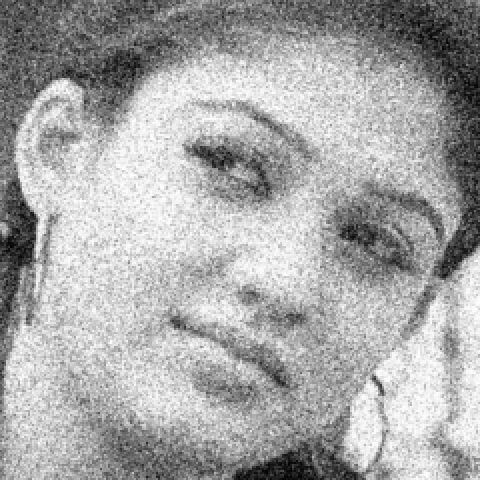

In [176]:
cA, (cH, cV, cD) = pywt.dwt2(i.astype('float'), 'haar')
# cA => LL coefficient
# cH => LH coefficient
# cV => HL coefficient
# cD => HH coefficient

thr=75 #threshold
cV[np.abs(cV)<thr]=0
cH[np.abs(cH)<thr]=0
cD[np.abs(cD)<thr]=0
#seting to zero any detail (LH, HL, HH) coefficient that is below a threshold

for i1 in range(cV.shape[0]):
    for j in range(cV.shape[1]):
        if(cV[i1,j]!=0):
            if(cV[i1,j]>0):
                cV[i1,j]-=thr #subtracting the threshold from those that are above the threshold
            else:
                cV[i1,j]+=thr

for i1 in range(cH.shape[0]):
    for j in range(cH.shape[1]):
        if(cH[i1,j]!=0):
            if(cH[i1,j]>0):
                cH[i1,j]-=thr #subtracting the threshold from those that are above the threshold
            else:
                cH[i1,j]+=thr

for i1 in range(cD.shape[0]):
    for j in range(cD.shape[1]):
        if(cD[i1,j]!=0):
            if(cD[i1,j]>0):
                cD[i1,j]-=thr #subtracting the threshold from those that are above the threshold
            else:
                cD[i1,j]+=thr

ik=pywt.idwt2((cA,(cH,cV,cD)),'haar')
ik=np.clip(ik,0,255).astype('uint8')
cv2_imshow(ik)

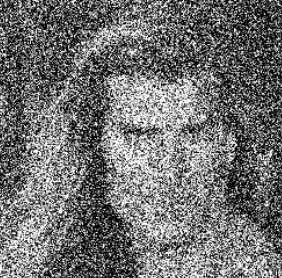

(278, 278)


In [182]:
i=cv2.imread('/content/drive/MyDrive/alex.jpg',0)
cv2_imshow(i)
i=i[0:278,0:278]
print(i.shape)

##Method of Chen et al

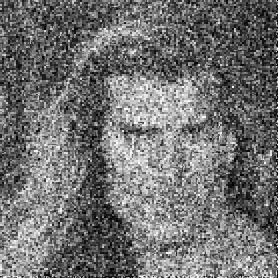

In [184]:
cA, (cH, cV, cD) = pywt.dwt2(i.astype('float'), 'haar')
cH1=cH.copy()
cV1=cV.copy()
cD1=cD.copy()

# cA => LL coefficient
# cH => LH coefficient
# cV => HL coefficient
# cD => HH coefficient

#function for find some of squares of the elements in a k x k sized window
def f(img,i,j,k):
    s=0
    for l1 in range(-(k//2),(k//2)+1):
        for l2 in range(-(k//2),(k//2)+1):
            if(i+l1>=0 and j+l2>=0):
                s+=img[i+l1,j+l2]**2
    return s

lamda=170

for i1 in range(0,cV.shape[0]-1):
    for j in range(0,cV.shape[1]-1):
        if(f(cV,i1,j,3)<= lamda**2):
            cV1[i1,j]=0
#Comparing S_{i,j}**2 to lamda**2
        else:
            cV1[i1,j]*=1-((lamda**2) /f(cV,i1,j,3))
#Shrinking the Wavelet Coefficients
#Performing similar procedure for other details

for i1 in range(0,cH.shape[0]-1):
    for j in range(0,cH.shape[1]-1):
        if(f(cH,i1,j,3)<= lamda**2):
            cH1[i1,j]=0
        else:
            cH1[i1,j]*=1-((lamda**2) /f(cH,i1,j,3))

for i1 in range(0,cD.shape[0]-1):
    for j in range(0,cD.shape[1]-1):
        if(f(cD,i1,j,3)<= lamda**2):
            cD1[i1,j]=0
        else:
            cD1[i1,j]*=1-((lamda**2) /f(cD,i1,j,3))

ik=pywt.idwt2((cA,(cH1,cV1,cD1)),'haar')
ik=np.clip(ik,0,255).astype('uint8')
cv2_imshow(ik)

##Hard Thresholding

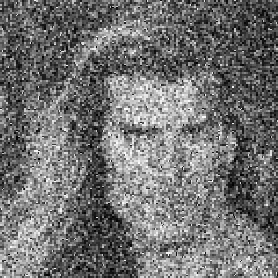

In [188]:
cA, (cH, cV, cD) = pywt.dwt2(i.astype('float'), 'haar')
# cA => LL coefficient
# cH => LH coefficient
# cV => HL coefficient
# cD => HH coefficient

thr=157 #threshold

cV[np.abs(cV)<thr]=0
cH[np.abs(cH)<thr]=0
cD[np.abs(cD)<thr]=0
#seting to zero any detail (LH, HL, HH) coefficient that is below the threshold

ik=pywt.idwt2((cA,(cH,cV,cD)),'haar')
ik=np.clip(ik,0,255).astype('uint8')
cv2_imshow(ik)